In [1]:
# Note: Original saved in Tahir Sproj folder

# Deep Learning Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data

# Data Manipulation and Analysis
import numpy as np
# import pandas as pd

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt

# File and System Interaction
import os
from pathlib import Path
import torch.optim as optim


# Date and Time Handling
import time
import datetime

# Neural Architecture
try:
    from torchinfo import summary
except:
    # %pip install torchinfo
    from torchinfo import summary
from scipy.fftpack import dct

In [2]:
%load_ext autoreload
%autoreload 2

from image_py_scripts import dataset_processing # for image inpainting experiment else use python_scripts
from python_scripts import dustmc_training
from python_scripts import logs_and_results
# from python_scripts import img_pdf_compiler
from python_scripts import utils
from python_scripts import DUST_MC
from python_scripts import dustmc_unrolled
from python_scripts import test
from python_scripts import generate_synthetic_data

In [3]:
# Setting up some global variables

ROOT = os.getcwd().replace('\\', '/') + '/DUSTMC_Data'
# ROOT = 'C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/HuberMC_Data'
# ROOT = 'C:/Users/HP/GitHub Workspace/ConvHuberMC-Net/HuberMC_Data'
TRY = 'Try 1'
SESSION = 'Session 1'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device, ROOT

('cpu',
 'c:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/DUSTMC_Data')

In [4]:
# Get parameters --> for convhubermc:
def get_default_param(gpu = True):
    params_net = {}
    params_net['size1'] = 150
    params_net['size2'] = 300
    params_net['rank'] = 10
    
    params_net['device'] = device
        
    params_net['layers'] = 3
    params_net['CalInGPU'] = gpu
    return params_net

In [5]:
hyper_param_net = dustmc_training.get_hyperparameter_grid('DUSTMC-Net', TrainInstances = 20, ValInstances = 10, BatchSize = 5, 
                                                          ValBatchSize = 2, num_epochs = 1, learning_rate = 0.001,
                                                          K = 5, mu = 0, sigma = 1, m = 50, n = 150, d = 512, T = 300)
params_net = get_default_param(gpu = True)

In [6]:
# Example usage:
model = dustmc_unrolled.DustNet(hyper_param_net)
S = torch.randn(hyper_param_net['n'], hyper_param_net['T'])
output = model(S)
print(output)

tensor([[ -169055.5156, -1101828.1250,  -199188.3125,  ...,
           157249.7812,  -393774.3125,  -878050.1250],
        [  424840.8125,   474607.9375,  -239576.4375,  ...,
           -15429.7500,   273806.0625,   125348.7578],
        [  528643.3750,  -745791.0625,   323006.2500,  ...,
          -840081.3750,  -618082.3750,   827907.0625],
        ...,
        [  966500.7500,  -403369.4375,    79372.3984,  ...,
          -248374.4375, -1006292.5625,  1161283.3750],
        [  134570.3281,  -314706.9062,    -9900.3516,  ...,
           -20498.4453,  -390973.5312,  -147674.2812],
        [  460189.7500,   844192.7500,    45262.8750,  ...,
          -567647.1250,   846319.0625,  -389550.2500]], grad_fn=<MmBackward0>)


In [8]:
summary(model, input_size = [hyper_param_net['n'], hyper_param_net['T']])

Layer (type:depth-idx)                   Output Shape              Param #
DustNet                                  [150, 300]                84,302
├─ModuleList: 1-1                        --                        --
│    └─BlueBoxLayer: 2-1                 [512, 300]                --
│    │    └─SelfAttention: 3-1           [512, 300]                --
│    │    └─LISTA: 3-2                   [512, 300]                287,745
│    └─BlueBoxLayer: 2-2                 [512, 300]                --
│    │    └─SelfAttention: 3-3           [512, 300]                --
│    │    └─LISTA: 3-4                   [512, 300]                287,745
│    └─BlueBoxLayer: 2-3                 [512, 300]                --
│    │    └─SelfAttention: 3-5           [512, 300]                --
│    │    └─LISTA: 3-6                   [512, 300]                287,745
│    └─BlueBoxLayer: 2-4                 [512, 300]                --
│    │    └─SelfAttention: 3-7           [512, 300]               

In [6]:
ProjectName = TRY + ' ' + hyper_param_net['Model'] + ' mu ' + logs_and_results.get_q_str(0.2) + ' sigma ' + logs_and_results.get_noise_str(3.0)

In [7]:
dir = logs_and_results.get_modularized_record(ProjectName, 0.2, 3.0, 'Plots', hyper_param_net, params_net, ROOT, SESSION, current_epoch = 19 + 1)
dir

'c:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/DUSTMC_Data/Q 20.0%/DB 3.0/Plots/HuberMC-Net/Session 1/Try 1 DUSTMC-Net mu 20.0% sigma 3.0 Layers_3_TrainInstances_20_Epochs_[20_out_of_20]_lr_0.001.png'

Project Name: Try 1 DUSTMC-Net mu 20.0% sigma 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'layers': 3, 'CalInGPU': True}

Epoch: 1, 2024-08-12 00:13:51, 

Epoch [1/20], Mean Training Loss:8.15109e+10, Mean Validation Loss:4.87904e+10
Epoch: 2, 2024-08-12 00:17:08, 

Epoch [2/20], Mean Training Loss:4.08154e+10, Mean Validation Loss:3.11774e+10
Epoch: 3, 2024-08-12 00:20:16, 

Epoch [3/20], Mean Training Loss:2.98223e+10, Mean Validation Loss:2.55033e+10
Epoch: 4, 2024-08-12 00:23:49, 

Epoch [4/20], Mean Training Loss:2.56889e+10, Mean Validation Loss:2.28543e+10
Epoch: 5, 2024-08-12 00:26:54, 

Epoch [5/20], Mean Training Loss:2.32550e+10, Mean Validation Loss:2.11636e+10
Saving Whole Model at Epochs: [5/20]
Saving Model Dict at Epochs: [5/20]
Epoch: 6, 2024-08-12 00:29:53, 

Epoch [6/20], Mean Training Loss:2.15078e+10, Mean Validation Loss:1.96003e+10
Epoch: 7, 2024-08-12 00:33:00, 

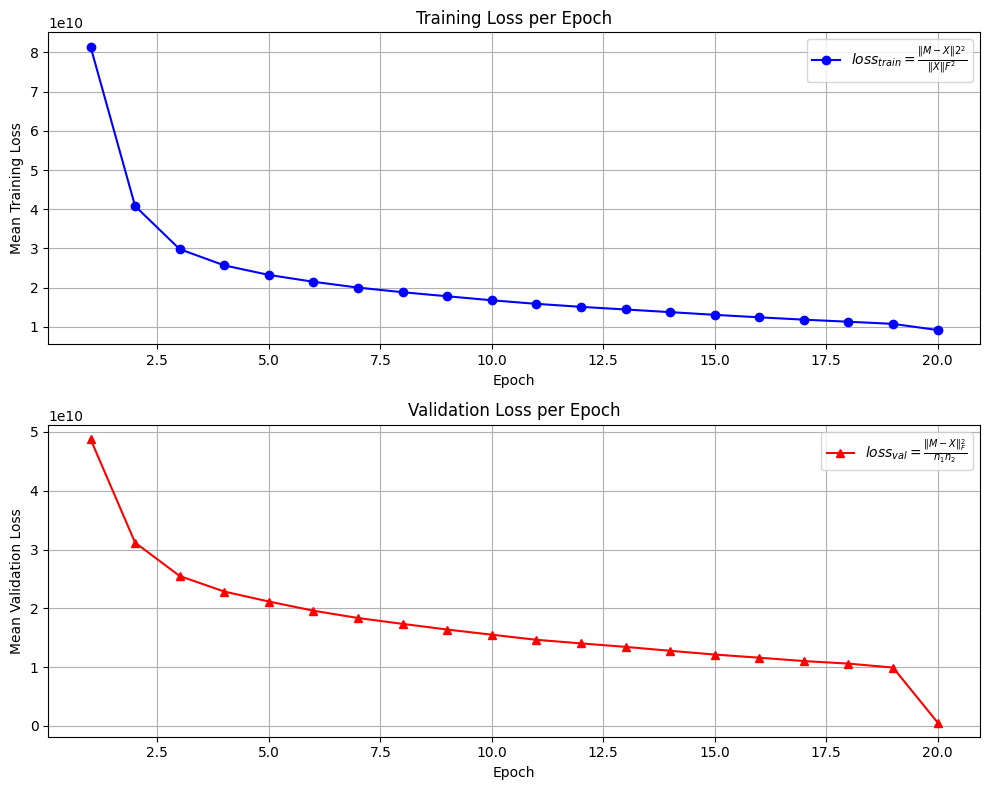

In [5]:
# Some settings for visualisation
matplotlib.use('Agg')
%matplotlib inline

seed = 123
torch.manual_seed(seed)

# Set parameters (including hyperparameters) and setting for saving/logging data
hyper_param_net = dustmc_training.get_hyperparameter_grid('DUSTMC-Net', TrainInstances = 20, ValInstances = 10, BatchSize = 5, 
                                                          ValBatchSize = 2, num_epochs = 20, learning_rate = 0.001,
                                                          K = 5, mu = 0, sigma = 1, m = 50, n = 150, d = 200, T = 300)
params_net = get_default_param(gpu = True)
CalInGPU = params_net['CalInGPU']

mu_list = [0.2]#, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
sigma_list = [3.0]#, 5.0, 6.0, 9.0]

for mu in mu_list:
    for sigma in sigma_list:
        # ProjectName = TRY + ' ' + logs_and_results.get_current_time() + ' ' + hyper_param_net['Model'] + ' ' + 'Sampling Rate: ' + logs_and_results.get_q_str(q) + ' and DB ' + logs_and_results.get_noise_str(db)

        ProjectName = TRY + ' ' + hyper_param_net['Model'] + ' mu ' + logs_and_results.get_q_str(mu) + ' sigma ' + logs_and_results.get_noise_str(sigma)
        # Note: Removed time stamp from log file name as : not supported. Weird because this was not a problem in linux

        # Get log file
        logfile = logs_and_results.get_modularized_record(ProjectName, mu, sigma, 'Logs', hyper_param_net, params_net, ROOT, SESSION)
        with open(logfile, 'w', 1) as log:
            print('Project Name: %s\n'%ProjectName)
            log.write('Project Name: %s\n\n'%ProjectName)

            # Get Model
            net = dustmc_training.get_model(params_net, hyper_param_net, log)
            print('\nParameters = \n%s\n'%str(params_net))
            log.write('\nParameters = \n%s\n\n'%str(params_net))

            #Loading data and creating dataloader for both test and training
            # print('Loading Data phase...')
            log.write('Loading phase...\n')
            shape_dset = (params_net['size1'], params_net['size2'])
            
            train_loader, val_loader = dataset_processing.get_dataloaders(params_net = params_net, hyper_param_net = hyper_param_net, sampling_rate = 0.5, db = 3.0, ROOT = ROOT, synthetic = False)

            # print('Finished loading.\n')
            log.write('Finished loading.\n\n')

            # Some additional settings for training including loss, optimizer,
            # floss = nn.functional.mse_loss(reduction = 'sum')
            floss = nn.MSELoss()
            optimizer = torch.optim.Adam(net.parameters(), lr = hyper_param_net['Lr'])
            # scheduler2 =  torch.optim.lr_scheduler.StepLR(optimizer, step_size= 1, gamma = 0.97, verbose = True)

            # Array for recording parameter values after each layer for each epoch etc
            outputs_L = dustmc_unrolled.to_var(torch.zeros([shape_dset[0], shape_dset[1]]), CalInGPU) 
            lossmean_vec = np.zeros((hyper_param_net['Epochs'], ))
            lossmean_val_vec = np.zeros((hyper_param_net['Epochs'], ))


            # dummy variable to monitor and record progress for loss
            minloss = np.inf

            for epoch in range(hyper_param_net['Epochs']):
                print(f'Epoch: {epoch + 1}, {logs_and_results.get_current_time()}, \n')
                log.write(f'Epoch: {epoch + 1} ')
                log.write(logs_and_results.get_current_time() + '\n\n')

                # Train and Test Steps. (Record every 5 epochs)
                if (epoch + 1) % 5 == 0:
                    # print('Loading and calculating training batches...')
                    log.write('Loading and calculating training batches...\n')
                    startime = time.time()
                    loss_mean = dustmc_training.train_step(net, train_loader, floss, optimizer, hyper_param_net['TrainInstances'], hyper_param_net['BatchSize']) # remove alpha from train func
                    endtime = time.time()
                    # print('Training time is %f'%(endtime - startime))
                    log.write('Training time is %f'%(endtime - startime))

                    # print('Loading and calculating validation batches...')
                    log.write('Loading and calculating validation batches...\n')
                    startime = time.time()
                    loss_val_mean = dustmc_training.test_step(net, val_loader, floss, hyper_param_net['ValInstances'], hyper_param_net['ValBatchSize'])
                    endtime = time.time()
                    # print('Test time is %f'%(endtime - startime))
                    log.write('Test time is %f'%(endtime - startime))

                else:
                    loss_mean = dustmc_training.train_step(net, train_loader, floss, optimizer, hyper_param_net['TrainInstances'], hyper_param_net['BatchSize'])
                    loss_val_mean = dustmc_training.test_step(net, val_loader, floss, hyper_param_net['ValInstances'], hyper_param_net['ValBatchSize'])

                # Update Record and Parameters
                lossmean_vec[epoch] = loss_mean
                lossmean_val_vec[epoch] = loss_val_mean


                print('Epoch [%d/%d], Mean Training Loss:%.5e, Mean Validation Loss:%.5e'
                      %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))

                # Update Log after every 5 epochs. Make a plot of MSE against epochs every 5 epochs. Save Model in whole/dict form every five epochs.
                if (epoch + 1) % 5 == 0:
                    print(f"Saving Whole Model at Epochs: [{epoch + 1}/{hyper_param_net['Epochs']}]")
                    model_whole_path = logs_and_results.get_modularized_record(ProjectName, mu, sigma, 'Saved Models - Whole', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
                    # torch.save(net, model_whole_path)
                    print(f"Saving Model Dict at Epochs: [{epoch + 1}/{hyper_param_net['Epochs']}]")
                    model_state_dict_path = logs_and_results.get_modularized_record(ProjectName, mu, sigma, 'Saved Models - Dict', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
                    # torch.save(net.state_dict(), model_state_dict_path)

                    log.write('Epoch [%d/%d], Mean Training Loss:%.5e, Mean Validation Loss:%.5e\n'
                              %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))
                    np.set_printoptions(precision = 3)

                    if True or loss_val_mean < minloss:
                        # print('saved at [epoch%d/%d]'%(epoch + 1, hyper_param_net['Epochs']))
                        log.write('saved at [epoch%d/%d]\n' %(epoch + 1, hyper_param_net['Epochs']))
                        minloss = min(loss_val_mean, minloss)

            # Finish off by observing the minimum loss on validation set

            #Print min loss
            # print('\nMin Loss = %.4e'%np.min(lossmean_val_vec))
            log.write('\nMin Loss = %.4e'%np.min(lossmean_val_vec))

            # Plotting MSE vs Epoch and Saving it
                                                           
            # Get Directory where we have to save the plot
            dir = logs_and_results.get_modularized_record(ProjectName, mu, sigma, 'Plots', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
            logs_and_results.plot_and_save_mse_vs_epoch(lossmean_vec, lossmean_val_vec, dir)

In [40]:
np.load('C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/Image_Inpainting_Data/BSDS300/images/train/lowrank/lowrank_image_MC_train_112.npy')

array([[  0.        , -10.30865701,   0.        , ...,   0.53315796,
          0.50693402, -23.66075387],
       [  0.        ,   0.        ,   0.        , ...,   0.52851632,
          1.06975984,   0.        ],
       [  0.64169247,   0.68091443,   0.        , ...,   0.62688489,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.75714298, ...,   0.        ,
          0.        ,   0.80518593],
       [  0.91521675,   0.85389145,   0.        , ...,   0.79786424,
          0.93392722,   0.        ],
       [  0.95097199,   0.        ,   0.        , ...,   0.        ,
          1.01814476,   0.69238964]])

In [10]:
import torch

# Example values
DH = torch.randn(10, 5)  # Shape (n, T)

# Compute βi values
beta_i = torch.exp(-0.5 * torch.sum(DH ** 2, dim=0))  # Shape (T,)

# Ensure indexing returns a tensor
index = 2
indexed_value = beta_i[index]

print(f"beta_i: {beta_i}")
print(f"Indexed value: {indexed_value}")
print(f"Type of indexed value: {type(indexed_value)}")  # Should be <class 'torch.Tensor'>


beta_i: tensor([0.0221, 0.0345, 0.0003, 0.0150, 0.0002])
Indexed value: 0.0003437580307945609
Type of indexed value: <class 'torch.Tensor'>


In [11]:
# Get relevant arguements for DUSTMC

M_train, M_Omega_train, M_test, M_Omega_test = generate_synthetic_data.generate_simple_gaussian_noise(150, 300, 10, 10, 2, 0.5, 3)

In [12]:
# Set the random seed for reproducibility
# np.random.seed(42)

rand_batch_idx = np.random.randint(0, M_Omega_train.shape[0])
X = M_Omega_train[rand_batch_idx, :, :]

# Initialize a m x n A measurement sensing matrix with random values from a uniform distribution between 0 and 1
A = np.random.uniform(0, 1, (100, 150)) # A is m x n. Since m << n and n is normally 150

# Initalize the Dictonary D which is n x d and d >> n by DCT. d is taken as 512
random_matrix = np.random.uniform(0, 1, (150, 512))

# Apply the Discrete Cosine Transform (DCT) to the matrix
D = dct(random_matrix, type = 2, norm = 'ortho')

# Initialize K (no. of iterations), and hyperparameters lambda_1, lambda_2, and c
K = 50
lambda_1 = 0.1
lambda_2 = 0.4
c = 1

In [13]:
# Now run the attention based algo on X to get its recovered/reconstructed form S
S = test.attention_based_algo(A, D, X, K, lambda_1, lambda_2, c)

/home/nehal/GitHubWorkspace/ConvHuberMC-Net/python_scripts/test.py:49: RuntimeWarning: overflow encountered in exp
  exp_values = np.exp(exponent_terms)
/home/nehal/GitHubWorkspace/ConvHuberMC-Net/python_scripts/test.py:52: RuntimeWarning: invalid value encountered in multiply
  G_numerator = np.sum(beta_values[:, None] * exp_values[:, None] * H.T, axis=0)
/home/nehal/GitHubWorkspace/ConvHuberMC-Net/python_scripts/test.py:53: RuntimeWarning: invalid value encountered in multiply
  G_denominator = np.sum(beta_values * exp_values)


In [14]:
# Now measure loss between reconstructed and groundtruth

groundtruth = M_train[rand_batch_idx, :, :]

print(f'The squared L2 norm loss is: {utils.compute_squared_l2_norm_loss(S, groundtruth)}')

The squared L2 norm loss is: nan
